# PROBLEM STATEMENT:



With the increasing popularity of short-term rentals, understanding the dynamics of India's Airbnb market is crucial for both hosts and travelers. The problem statement aims to analyze India's Airbnb listings in 2024, exploring factors such as rental prices, room types, host status, and guest ratings. By uncovering trends and patterns in the data, we seek to provide actionable insights for hosts to optimize their listings and enhance guest experiences, ultimately contributing to the growth and sustainability of the Airbnb ecosystem in India.

We start of by importing relevant libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import plotly as px
import plotly.graph_objects as go
import plotly.express as px


next i am loadind the dataframe into pandas

In [3]:
data = pd.read_csv("Airbnb_India_Top_500[1].csv")


In [4]:
df= data

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   address              500 non-null    object 
 1   isHostedBySuperhost  500 non-null    bool   
 2   location/lat         500 non-null    float64
 3   location/lng         500 non-null    float64
 4   name                 500 non-null    object 
 5   numberOfGuests       500 non-null    int64  
 6   pricing/rate/amount  500 non-null    int64  
 7   roomType             500 non-null    object 
 8   stars                196 non-null    float64
dtypes: bool(1), float64(3), int64(2), object(3)
memory usage: 31.9+ KB


In [9]:
# Displaying basic information about the dataset
print("Shape of the dataset:", data.shape)

Shape of the dataset: (500, 9)


In [10]:
print("\nColumn names:\n", data.columns)


Column names:
 Index(['address', 'isHostedBySuperhost', 'location/lat', 'location/lng',
       'name', 'numberOfGuests', 'pricing/rate/amount', 'roomType', 'stars'],
      dtype='object')


In [11]:
print("\nFirst few rows of the dataset:\n", data.head())


First few rows of the dataset:
                             address  isHostedBySuperhost  location/lat  \
0   Manali, Himachal Pradesh, India                False      32.22330   
1   Manali, Himachal Pradesh, India                False      32.22352   
2                        Goa, India                False      15.50400   
3  Bhuntar, Himachal Pradesh, India                False      31.88656   
4          Jaipur, Rajasthan, India                False      26.85991   

   location/lng                                              name  \
0      77.18228                        HighQ Manali / Deluxe Room   
1      77.18152                      Highq manali / 3 BHK Cottage   
2      73.86600       Best view of the river from your terrace 04   
3      77.14467                                          Shabashe   
4      75.66909  Luxurious Independent Studio with Wifi & Kitchen   

   numberOfGuests  pricing/rate/amount                    roomType  stars  
0               3              

In [13]:
# Checking for missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 address                  0
isHostedBySuperhost      0
location/lat             0
location/lng             0
name                     0
numberOfGuests           0
pricing/rate/amount      0
roomType                 0
stars                  304
dtype: int64


In [15]:
# Step 1: Handling missing values
# Impute missing values in the 'stars' column with the mean rating
mean_rating = data['stars'].mean()
data['stars'].fillna(mean_rating, inplace=True)

In [16]:
# Step 2: Removing duplicates
# Remove duplicate rows
cleaned_data = data.drop_duplicates()

In [17]:
# Final check to ensure data cleanliness
print("Shape of cleaned dataset:", cleaned_data.shape)

Shape of cleaned dataset: (500, 9)


In [18]:
# Checking for missing values again
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 address                0
isHostedBySuperhost    0
location/lat           0
location/lng           0
name                   0
numberOfGuests         0
pricing/rate/amount    0
roomType               0
stars                  0
dtype: int64


# DATA VISUALIZATION

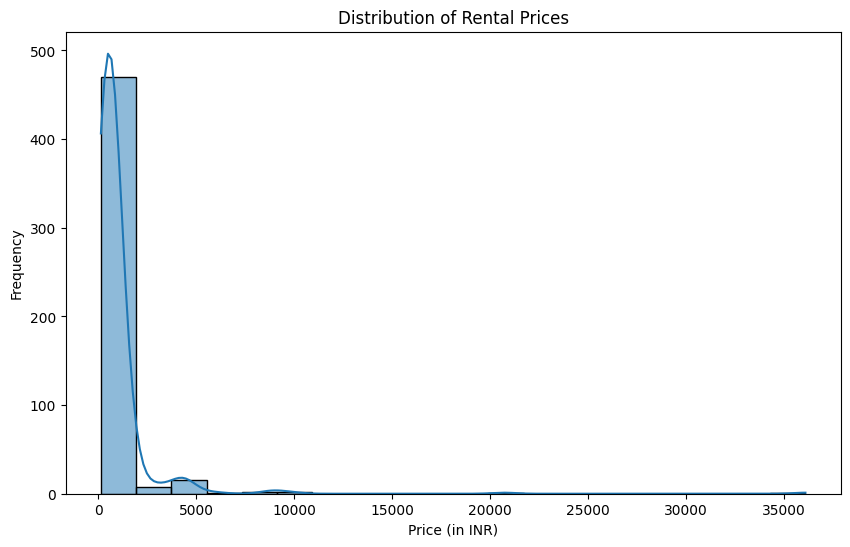

In [23]:
#Distribution of rental prices
plt.figure(figsize=(10, 6))
sns.histplot(data['pricing/rate/amount'], bins=20, kde=True)
plt.title('Distribution of Rental Prices')
plt.xlabel('Price (in INR)')
plt.ylabel('Frequency')
plt.show()


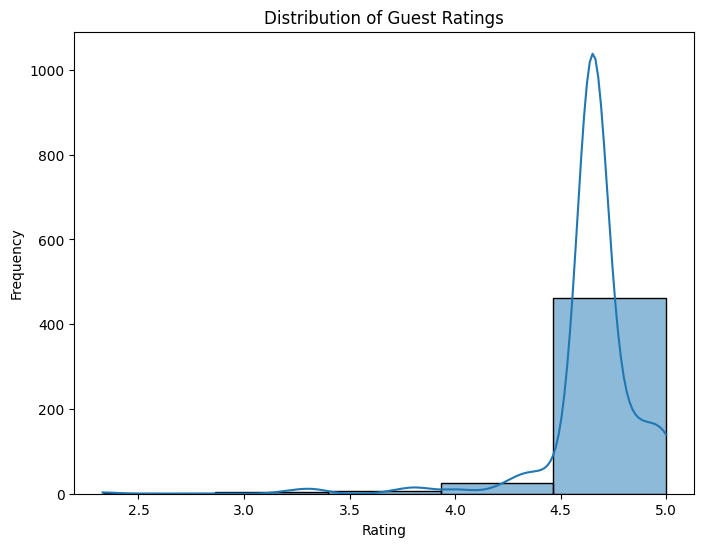

In [24]:
#Distribution of guest ratings
plt.figure(figsize=(8, 6))
sns.histplot(data['stars'], bins=5, kde=True)
plt.title('Distribution of Guest Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


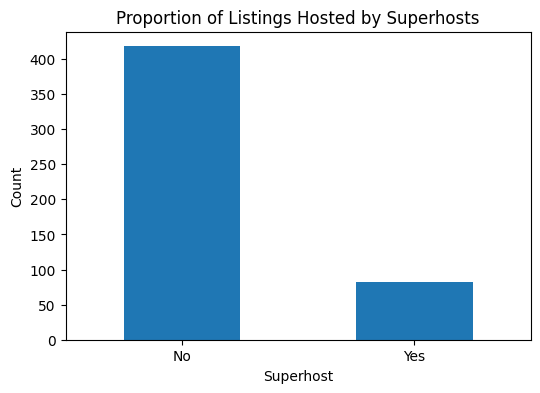

In [25]:
#Proportion of listings hosted by superhosts
plt.figure(figsize=(6, 4))
data['isHostedBySuperhost'].value_counts().plot(kind='bar')
plt.title('Proportion of Listings Hosted by Superhosts')
plt.xlabel('Superhost')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.show()


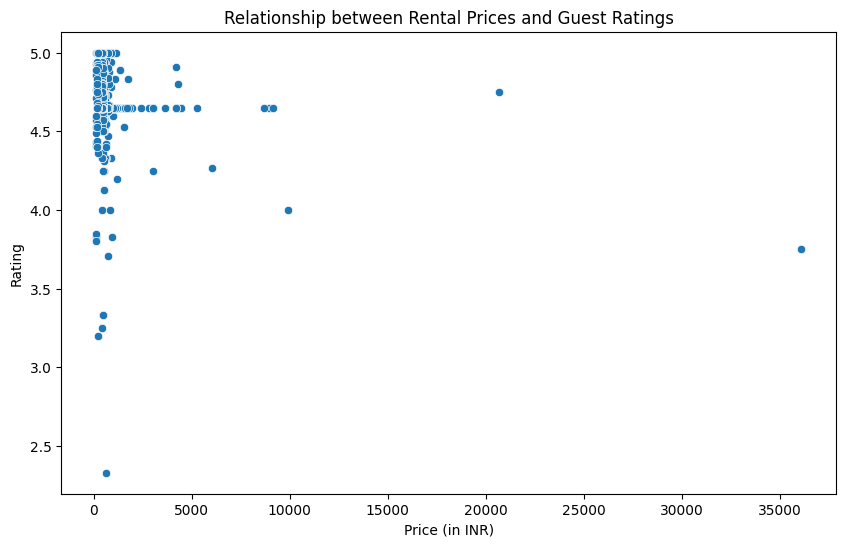

In [26]:
#Relationship between rental prices and guest ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pricing/rate/amount', y='stars', data=data)
plt.title('Relationship between Rental Prices and Guest Ratings')
plt.xlabel('Price (in INR)')
plt.ylabel('Rating')
plt.show()


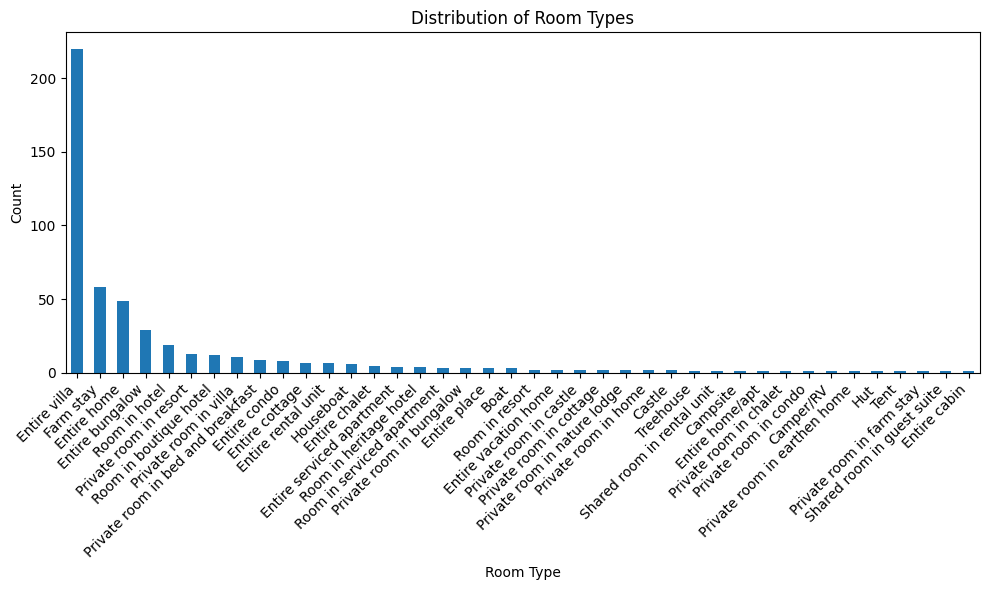

In [28]:
# Distribution of room types with rotated x-axis labels
plt.figure(figsize=(10, 6))
room_type_counts = data['roomType'].value_counts()
room_type_counts.plot(kind='bar')
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels by 45 degrees
plt.tight_layout()  # Adjusting layout to prevent overlapping
plt.show()


How do the rental prices vary across different room types listed on Airbnb in India in 2024, and are there any notable differences or trends in pricing between room types?

In [29]:
# Grouping data by room type and calculate median rental price
room_type_median_prices = data.groupby('roomType')['pricing/rate/amount'].median().reset_index()

# Creating a grouped bar plot with Plotly
fig = go.Figure(data=[
    go.Bar(name='Median Price', x=room_type_median_prices['roomType'], y=room_type_median_prices['pricing/rate/amount'])
])

# Customizing layout
fig.update_layout(title='Median Rental Prices by Room Type',
                  xaxis_title='Room Type',
                  yaxis_title='Median Price (INR)',
                  width=800, height=600)

# Showing plot
fig.show()


What are the geographical hotspots for Airbnb listings in India in 2024, and are there any notable concentrations of listings in specific regions?

In [33]:
#Distribution of listings across different locations in India
fig = px.scatter_mapbox(data,
                        lat='location/lat',
                        lon='location/lng',
                        color_discrete_sequence=["blue"],
                        zoom=3.5,
                        title='Distribution of Airbnb Listings in India',
                        height=600,
                        hover_name='name')
fig.update_layout(mapbox_style="open-street-map")
fig.show()


What is the typical accommodation capacity offered by Airbnb listings in India in 2024, and are there any common patterns or trends in the distribution of accommodation capacities?

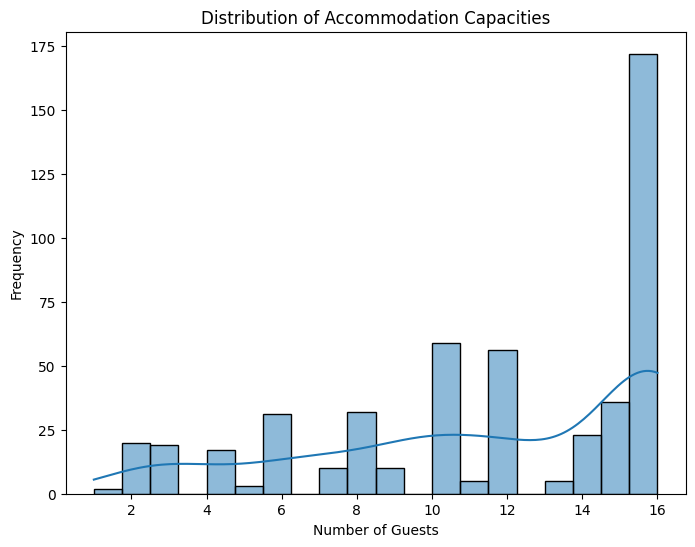

In [35]:
# Distribution of accommodation capacities (number of guests)
plt.figure(figsize=(8, 6))
sns.histplot(data['numberOfGuests'], bins=20, kde=True)
plt.title('Distribution of Accommodation Capacities')
plt.xlabel('Number of Guests')
plt.ylabel('Frequency')
plt.show()


How do rental prices vary based on the accommodation capacity (number of guests) offered by Airbnb listings in India in 2024, and is there any noticeable trend or pattern in the relationship between accommodation capacity and rental prices?

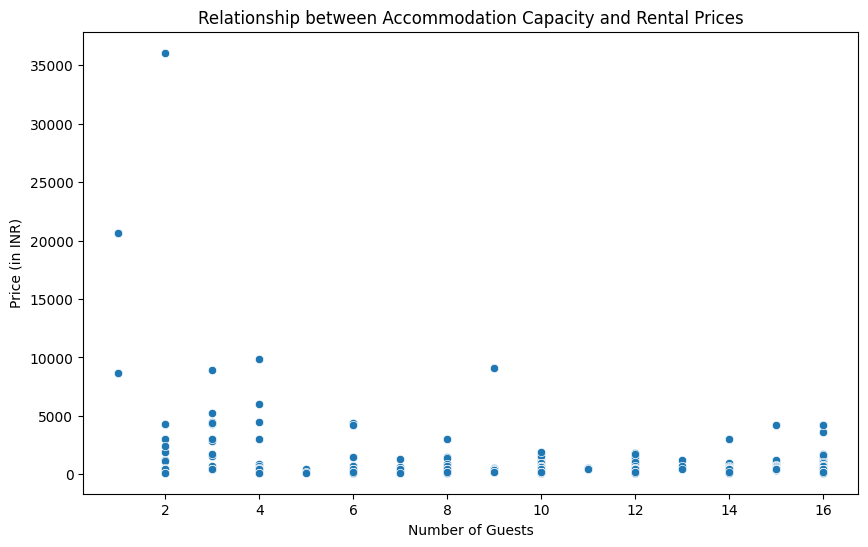

In [37]:
#Relationship between accommodation capacity and rental prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x='numberOfGuests', y='pricing/rate/amount', data=data)
plt.title('Relationship between Accommodation Capacity and Rental Prices')
plt.xlabel('Number of Guests')
plt.ylabel('Price (in INR)')
plt.show()


How do rental prices and guest ratings compare between listings hosted by superhosts and non-superhosts on Airbnb in India in 2024, and are there any significant differences or trends in pricing and ratings based on host status?

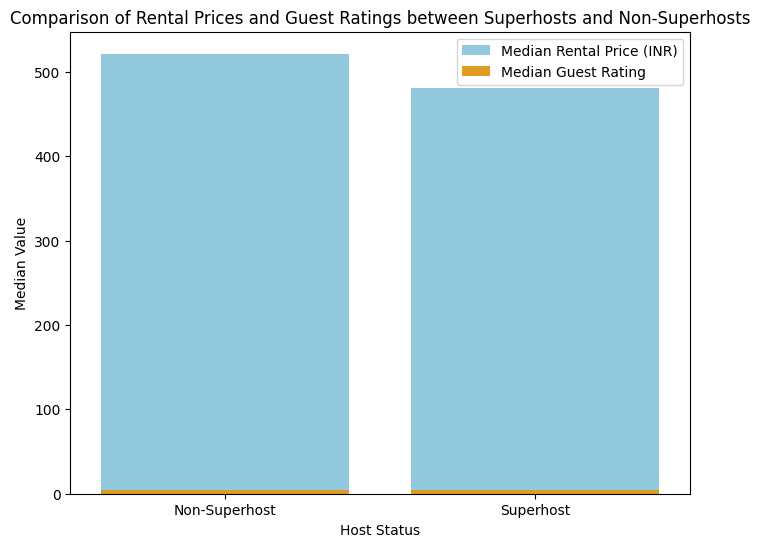

In [38]:
# Grouping data by host status and calculating median rental price and median guest rating
host_stats = data.groupby('isHostedBySuperhost').agg({'pricing/rate/amount': 'median', 'stars': 'median'}).reset_index()
host_stats['isHostedBySuperhost'] = host_stats['isHostedBySuperhost'].map({True: 'Superhost', False: 'Non-Superhost'})

# Comparison of rental prices and guest ratings between superhosts and non-superhosts
plt.figure(figsize=(8, 6))
sns.barplot(x='isHostedBySuperhost', y='pricing/rate/amount', data=host_stats, color='skyblue', label='Median Rental Price (INR)')
sns.barplot(x='isHostedBySuperhost', y='stars', data=host_stats, color='orange', label='Median Guest Rating')
plt.title('Comparison of Rental Prices and Guest Ratings between Superhosts and Non-Superhosts')
plt.xlabel('Host Status')
plt.ylabel('Median Value')
plt.legend()
plt.xticks(rotation=0)
plt.show()


Summary:

In this analysis, we explored India's Airbnb landscape in 2024 using a curated dataset of 500 trending properties. The dataset provided insights into various aspects of Airbnb listings, including location details, host status, accommodation capacity, rental prices, room types, and guest ratings. Through visualizations and analyses, we gained a comprehensive understanding of the rental market, identified trends, and explored factors influencing guest experiences